In [22]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

`summarise()` has grouped output by 'sample', 'type', 'sample_type'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'sample', 'type', 'sample_type'. You can override using the `.groups` argument.


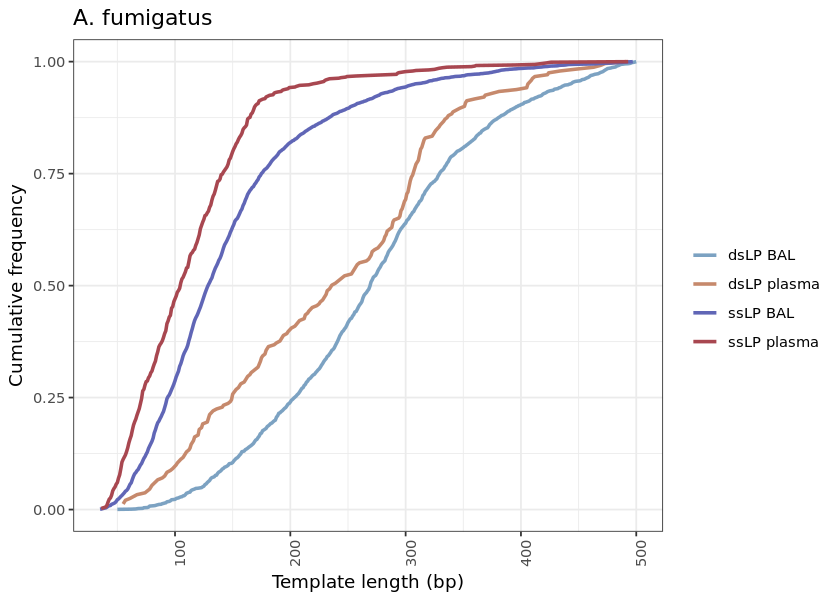

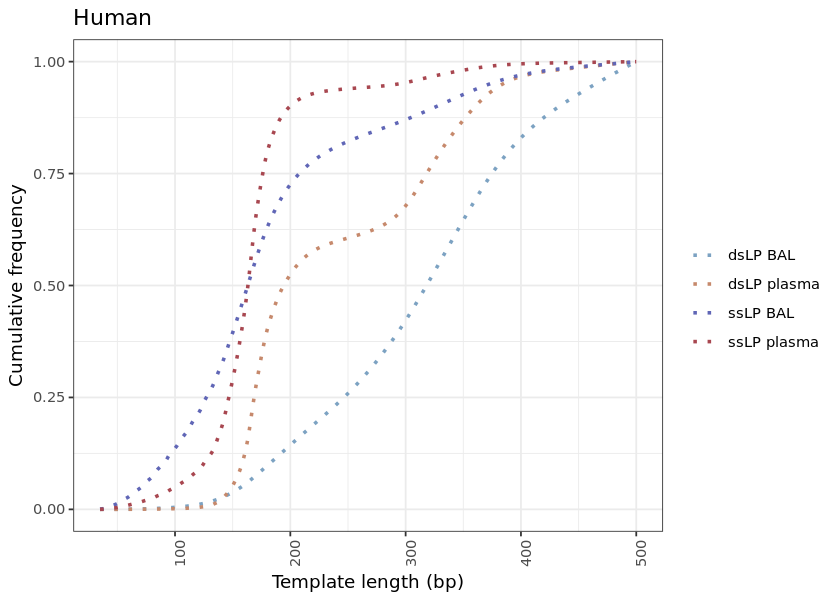

In [23]:
options(repr.plot.width=7, repr.plot.height=5)
Afum_length_cumm <- Afum_IS_meta %>%
    filter(origin != "controls") %>%
    filter(type != "ds-wcDNA") %>%
    filter(TLEN >= -500 & TLEN <= 500) %>% 
    mutate(TLEN = abs(TLEN)) %>%
    group_by(sample, type, sample_type, TLEN) %>%
    summarise(sumCount = sum(Count)) %>%
    arrange(TLEN) %>%  # Ensure TLEN is in order for cumulative sums
    mutate(cumSumCount = cumsum(as.numeric(sumCount))/sum(sumCount)) %>%  # Create cumulative sum for each group
    ggplot(aes(x = TLEN, y = cumSumCount, col = sample_type)) + 
        geom_line(size = 1, linetype = 1) +  # Use geom_line to plot the cumulative curve
        #facet_grid(rows = vars(sample), cols = vars(type)) + 
        scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                      "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
        xlab("Template length (bp)") + ylab("Cumulative frequency") + labs(color = "") + 
        theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1), 
            strip.background = element_rect(color = "white", fill = "white"), 
            strip.text.x = element_text(size = 7), 
            panel.spacing = unit(1, "lines"), 
            strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) + ggtitle("A. fumigatus")

Afum_length_cumm %>% print()

ggsave(paste0("../../output_figures/Afumigatus_length_cummulative.png"), plot = Afum_length_cumm, 
            width = 7, height = 5)
ggsave(paste0("../../output_figures/Afumigatus_length_cummulative.pdf"), plot = Afum_length_cumm, 
            width = 7, height = 5)

host_nonMT_length_cumm <- host_nonMT_IS_meta  %>%
    filter(origin != "controls") %>%
    filter(type != "ds-wcDNA") %>%
    filter(TLEN >= -500 & TLEN <= 500) %>% 
    mutate(TLEN = abs(TLEN)) %>%
    group_by(sample, type, sample_type, TLEN) %>%
    summarise(sumCount = sum(Count)) %>%
    arrange(TLEN) %>%  # Ensure TLEN is in order for cumulative sums
    mutate(cumSumCount = cumsum(as.numeric(sumCount))/sum(sumCount)) %>%  # Create cumulative sum for each group
    ggplot(aes(x = TLEN, y = cumSumCount, col = sample_type)) + 
        geom_line(size = 1, linetype = 3) +  # Use geom_line to plot the cumulative curve
        #facet_grid(rows = vars(sample), cols = vars(type)) + 
        scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                      "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
        xlab("Template length (bp)") + ylab("Cumulative frequency") + labs(color = "") + 
        theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1), 
            strip.background = element_rect(color = "white", fill = "white"), 
            strip.text.x = element_text(size = 7), 
            panel.spacing = unit(1, "lines"), 
            strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) + ggtitle("Human")

host_nonMT_length_cumm %>% print()

ggsave(paste0("../../output_figures/host_nonMT_length_cummulative.png"), plot = host_nonMT_length_cumm, 
            width = 7, height = 5)
ggsave(paste0("../../output_figures/host_nonMT_length_cummulative.pdf"), plot = host_nonMT_length_cumm, 
            width = 7, height = 5)

# A tibble: 2 × 7
# Groups:   sample, type, sample_type, source [2]
  sample type  sample_type  TLEN source       sumCount cumSumCount
  <chr>  <chr> <chr>       <int> <chr>           <int>       <dbl>
1 plasma dsLP  dsLP plasma   101 A. fumigatus        4      0.0998
2 plasma ssLP  ssLP plasma   101 A. fumigatus       10      0.477 


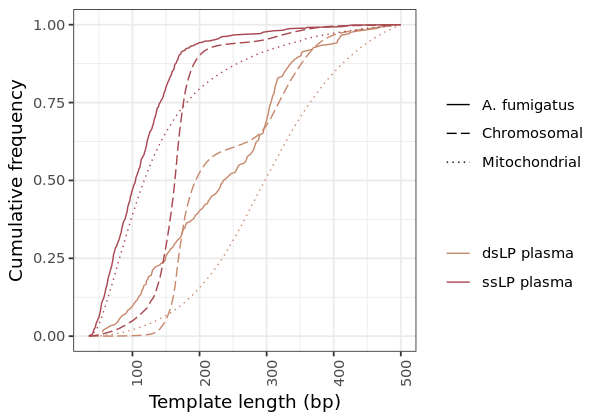

# A tibble: 2 × 7
# Groups:   sample, type, sample_type, source [2]
  sample type  sample_type  TLEN source       sumCount cumSumCount
  <chr>  <chr> <chr>       <int> <chr>           <int>       <dbl>
1 BAL    dsLP  dsLP BAL      101 A. fumigatus        8      0.0246
2 BAL    ssLP  ssLP BAL      101 A. fumigatus       70      0.296 


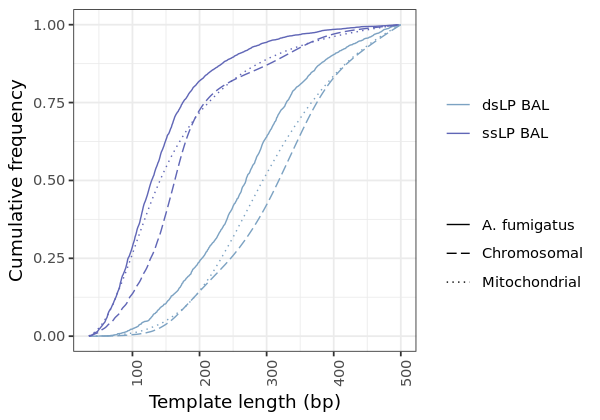

In [29]:
options(repr.plot.width=5, repr.plot.height=3.5)
# Add a column to distinguish the two datasets
Afum_data <- Afum_IS_meta %>%
    filter(origin != "controls") %>%
    filter(type != "ds-wcDNA") %>%
    filter(TLEN >= -500 & TLEN <= 500) %>% 
    mutate(TLEN = abs(TLEN),
           source = "A. fumigatus")  # Adding the source label

host_nonMT_data <- host_nonMT_IS_meta %>%
    filter(origin != "controls") %>%
    filter(type != "ds-wcDNA") %>%
    filter(TLEN >= -500 & TLEN <= 500) %>% 
    mutate(TLEN = abs(TLEN),
           source = "Chromosomal")  # Adding the source label

host_MT_data <- host_MT_IS_meta %>%
    filter(origin != "controls") %>%
    filter(type != "ds-wcDNA") %>%
    filter(TLEN >= -500 & TLEN <= 500) %>% 
    mutate(TLEN = abs(TLEN),
           source = "Mitochondrial")  # Adding the source label

# Combine the two datasets
combined_data <- bind_rows(Afum_data, host_nonMT_data, host_MT_data)

for (sel_sample in c("plasma", "BAL")){
    # Generate the cumulative plot for both datasets
    data_cum_sum <- combined_data %>%
        filter(sample == sel_sample) %>% 
        group_by(sample, type, sample_type, TLEN, source) %>%
        summarise(sumCount = sum(Count), .groups = "keep") %>%
        arrange(TLEN) %>%  # Ensure TLEN is in order for cumulative sums
        group_by(sample, type, sample_type, source) %>%
        mutate(cumSumCount = cumsum(as.numeric(sumCount)) / sum(sumCount)) 
    
    combined_plot <- data_cum_sum  %>% 
        ggplot(aes(x = TLEN, y = cumSumCount, col = sample_type, linetype = source)) + 
            geom_line(size = 0.4) +  # Use geom_line to plot the cumulative curve
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                          "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
            scale_linetype_manual(
                values = setNames(c("solid", "longdash", "dotted"), 
                                    c("A. fumigatus", "Chromosomal", "Mitochondrial"))) + 
            xlab("Template length (bp)") + ylab("Cumulative frequency") + labs(color = "", linetype = "") + 
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                strip.background = element_rect(color = "white", fill = "white"), 
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) 

    # Print the combined plot
    combined_plot %>% print()

    # Save the plot
    ggsave(paste0("../../output_figures/combined_length_", sel_sample,"_cummulative.png"), 
           plot = combined_plot, width = 5, height = 3.5)
    ggsave(paste0("../../output_figures/combined_length_", sel_sample,"_cummulative.pdf"), 
           plot = combined_plot, width = 5, height = 3.5)
    
    data_cum_sum %>% filter(TLEN == 101) %>% filter(source == "A. fumigatus") %>% print()
}

Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale ran

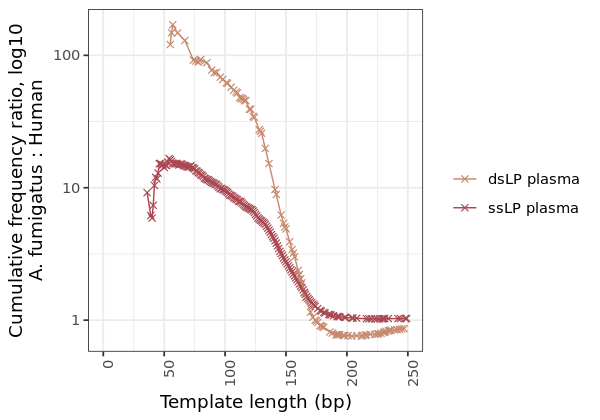

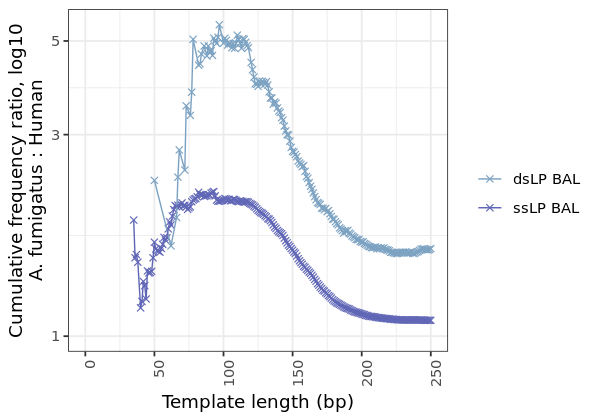

In [35]:
# Step 1: Add a column to distinguish the two datasets
Afum_data <- Afum_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Aspergillus")  # Adding the source label

host_nonMT_data <- host_nonMT_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Human")  # Adding the source label

host_MT_data <- host_MT_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Human")  #purpusly adding same source label to sum MT and nonMT

# Step 2: Combine the two datasets
combined_data <- bind_rows(Afum_data, host_nonMT_data, host_MT_data)

for (sel_sample in c("plasma", "BAL")){
    # Step 3: Calculate the cumulative sum for each sample_type and TLEN, grouped by source
    cum_sum_data <- combined_data %>%
        filter(sample == sel_sample) %>% 
        group_by(sample, type, sample_type, TLEN, source) %>%
        summarise(sumCount = sum(Count), .groups = "keep") %>%
        arrange(TLEN) %>%  # Ensure TLEN is in order for cumulative sums
        group_by(sample, type, sample_type, source) %>%
        mutate(cumSumCount = cumsum(as.numeric(sumCount)) / sum(sumCount))  %>%  # Cumulative sum
        select(-sumCount)

    # Step 4: Pivot the data to get separate columns for Aspergillus and Human cumSumCount
    cum_sum_wide <- cum_sum_data %>%
        pivot_wider(names_from = source, values_from = cumSumCount, values_fill = 0)  # Fill missing values with 0

    # Step 5: Calculate the Aspergillus:Human ratio of cumulative sums for each sample_type and TLEN
    cum_sum_wide <- cum_sum_wide %>%
        mutate(ratio = ifelse(Human > 0, Aspergillus/Human, NA)) %>% # Set ratio to NA when Human cumSumCount is 0
        filter(Aspergillus != 0) %>% 
        filter(!is.na(ratio))

    # Step 6: Plot the Aspergillus:Human ratio by TLEN for each sample_type
    ratio_plot <- cum_sum_wide %>%
        ggplot(aes(x = TLEN, y = ratio, col = sample_type)) + 
            geom_point(shape = 4) + 
            geom_line(size = 0.4) +  # Plot the ratio line
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                          "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
            xlab("Template length (bp)") + ylab("Cumulative frequency ratio, log10\nA. fumigatus : Human") + 
            #ggtitle("Ratio Aspergillus fumigatus:Human chromosomal\nbased on cumulative frequency") + 
            theme_bw() + xlim(0,250) + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_y_log10() + labs(color = "")  

    # Print the ratio plot
    ratio_plot %>% print()

    # Save the plot
    ggsave(paste0("../../output_figures/Aspergillus_Human_ratioCumSUm_length_", sel_sample, "_cummulative.png"), 
           plot = ratio_plot, width = 5, height = 3.5)
    ggsave(paste0("../../output_figures/Aspergillus_Human_ratioCumSUm_length_", sel_sample, "_cummulative.pdf"), 
           plot = ratio_plot, width = 5, height = 3.5)
    
}

Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 101 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 407 rows containing missing values or values outside the scale ran

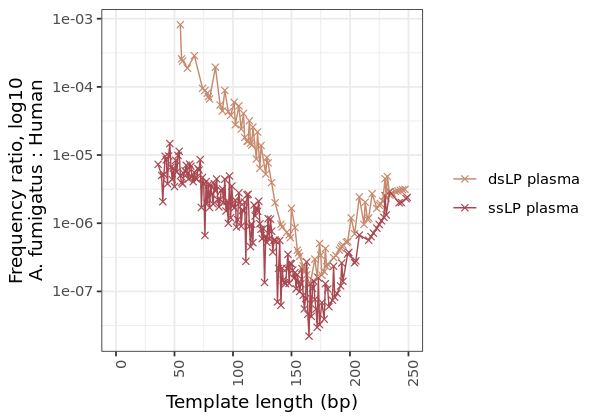

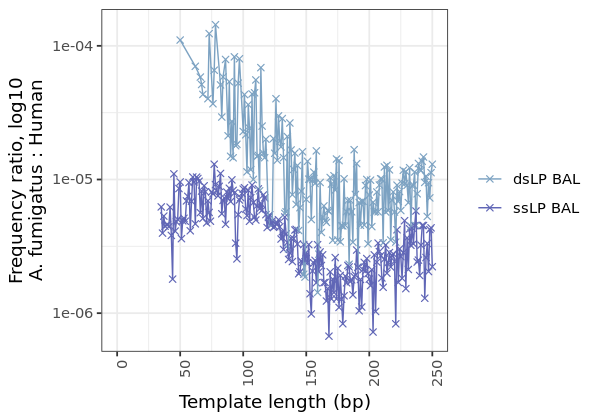

In [34]:
# Step 1: Add a column to distinguish the two datasets
Afum_data <- Afum_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Aspergillus")  # Adding the source label

host_nonMT_data <- host_nonMT_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Human")  # Adding the source label

host_MT_data <- host_MT_IS_meta %>%
    filter(read == "R1") %>% 
    mutate(source = "Human")  #purpusly adding same source label to sum MT and nonMT

# Step 2: Combine the two datasets
combined_data <- bind_rows(Afum_data, host_nonMT_data, host_MT_data)

for (sel_sample in c("plasma", "BAL")){
    # Step 3: Calculate the cumulative sum for each sample_type and TLEN, grouped by source
    cum_sum_data <- combined_data %>%
        filter(sample == sel_sample) %>% 
        group_by(sample, type, sample_type, TLEN, source) %>%
        summarise(sumCount = sum(Count), .groups = "keep") %>%
        arrange(TLEN) %>%  # Ensure TLEN is in order for cumulative sums
        group_by(sample, type, sample_type, source) 

    # Step 4: Pivot the data to get separate columns for Aspergillus and Human sumCount
    cum_sum_wide <- cum_sum_data %>%
        pivot_wider(names_from = source, values_from = sumCount, values_fill = 0)  # Fill missing values with 0

    # Step 5: Calculate the Aspergillus:Human ratio of cumulative sums for each sample_type and TLEN
    cum_sum_wide <- cum_sum_wide %>%
        mutate(ratio = ifelse(Human > 0, Aspergillus/Human, NA)) %>% # Set ratio to NA when Human sumCount is 0
        filter(Aspergillus != 0) %>% 
        filter(!is.na(ratio))

    # Step 6: Plot the Aspergillus:Human ratio by TLEN for each sample_type
    ratio_plot <- cum_sum_wide %>%
        ggplot(aes(x = TLEN, y = ratio, col = sample_type)) + 
            geom_point(shape = 4) + 
            geom_line(size = 0.4) +  # Plot the ratio line
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                          "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
            xlab("Template length (bp)") + ylab("Frequency ratio, log10\nA. fumigatus : Human") + 
            #ggtitle("Ratio Aspergillus fumigatus:Human chromosomal\nbased on cumulative frequency") + 
            theme_bw() + xlim(0,250) + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_y_log10() + labs(color = "")  

    # Print the ratio plot
    ratio_plot %>% print()

    # Save the plot
    ggsave(paste0("../../output_figures/Aspergillus_Human_ratio_length_", sel_sample, "_cummulative.png"), 
           plot = ratio_plot, width = 5, height = 3.5)
    ggsave(paste0("../../output_figures/Aspergillus_Human_ratio_length_", sel_sample, "_cummulative.pdf"), 
           plot = ratio_plot, width = 5, height = 3.5)
    
}

In [28]:
cum_sum_wide %>% 
    group_by(sample, type, sample_type) %>%  
    summarize(max_ratio = max(ratio, na.rm = TRUE), .groups = 'keep')

sample,type,sample_type,max_ratio
<chr>,<chr>,<chr>,<dbl>
BAL,dsLP,dsLP BAL,1.438890e-04
BAL,ssLP,ssLP BAL,1.300828e-05
